# Assignment 4 - Active Learning and Cost Effective-Labelling

Team 35, Members:     



| Name | Roll Number |  
| ------ | ------ |  
| Himanshu Singhal | 24120030 |  
| Gaurav | 24120028 |  

## Introduction
Active learning is a machine learning approach that aims to improve model performance by iteratively selecting the most informative data points for labeling. In this assignment, we compare three active learning methods—**Random Sampling**, **Uncertainty Sampling**, and **Query-by-Committee**—based on their **final accuracy** and **delta** values. The goal is to determine which method is the most cost-effective for achieving high accuracy.



## Task 1: Setup the Dataset

#### Install and Import modules

In [1]:
!pip install datasets numpy scikit-learn

import numpy as np
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from copy import deepcopy
from sklearn.metrics import accuracy_score
from scipy.stats import mode

Defaulting to user installation because normal site-packages is not writeable
  Using cached datasets-3.2.0-py3-none-any.whl.metadata (20 kB)
  Using cached pyarrow-19.0.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached xxhash-3.5.0-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached multiprocess-0.70.16-py312-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
  Using cached aiohappyeyeballs-2.4.4-py3-none-any.whl.metadata (6.1 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached frozenlist-1.5.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached multidict-6.1.0-cp312-cp312-win_amd64.whl.metadata (5.1 kB)
  Using cached propcache-0.2.1-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached yarl-1.18.3-cp312-cp312-win_amd64.whl.metadata (71 kB)
Using cached dat


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Load the MNIST dataset using the Hugging Face datasets library.


In [2]:
# Step 1: Load the MNIST dataset
# The MNIST dataset contains 28x28 grayscale images of handwritten digits (0-9).
# Each image is represented as a PIL image in the Hugging Face dataset.
print("Loading the MNIST dataset...")
dataset = load_dataset("mnist")  # Keys: 'train' and 'test'
print("Dataset loaded successfully!")
dataset


Loading the MNIST dataset...
Dataset loaded successfully!


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

#### Convert the image data into Numpy arrays and normalize pixel values to the range [0,1].


In [3]:
# Step 2: Convert the image data into NumPy arrays and normalize pixel values
# Convert training and testing images to NumPy arrays.
# Shapes:
# - train_images: (60000, 28, 28) -> 60,000 images, each of 28x28 pixels
# - test_images: (10000, 28, 28) -> 10,000 images, each of 28x28 pixels
print("\nConverting images to NumPy arrays and normalizing pixel values...")
train_images = np.array([np.array(img) for img in dataset['train']['image']])
test_images = np.array([np.array(img) for img in dataset['test']['image']])
train_images



Converting images to NumPy arrays and normalizing pixel values...


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

#### Flatten each image into a vector of 784 features.


In [ ]:
# Step 3: Flatten each image into a vector of 784 features
# Flattening reshapes each 28x28 image into a single vector of size 784.
# New shapes:
# - train_images_flat: (60000, 784)
# - test_images_flat: (10000, 784)
print("\nFlattening images to vectors of size 784...")
train_images_flat = train_images.reshape(-1, 28 * 28)
test_images_flat = test_images.reshape(-1, 28 * 28)
print(f"Flattened training images shape: {train_images_flat.shape}")
print(f"Flattened testing images shape: {test_images_flat.shape}")



Flattening images to vectors of size 784...
Flattened training images shape: (60000, 784)
Flattened testing images shape: (10000, 784)


#### See an image using matplotlib to verify preprocessing

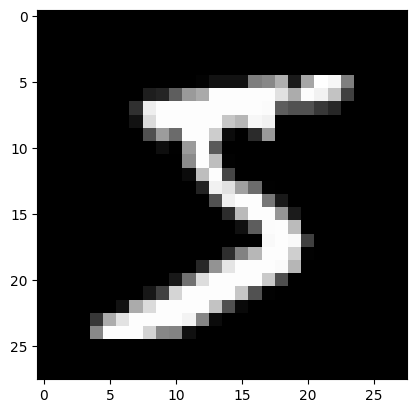

In [ ]:
plt.imshow(dataset["train"][0]["image"], cmap='gray')

#### Split the dataset into training and testing sets.


In [ ]:
# Step 4: Split the dataset into training and testing sets
# Using 80% of the data for training and 20% for testing.
# Shapes after split:
# - X_train: (48000, 784) -> Training images
# - X_test: (12000, 784) -> Testing images
# - y_train: (48000,) -> Training labels
# - y_test: (12000,) -> Testing labels
print("\nSplitting dataset into training and testing sets...")
# X_train, X_test, y_train, y_test = train_test_split(
#     train_images_flat, dataset['train']['label'], test_size=0.2, random_state=42
# )

X_train = train_images_flat
y_train = dataset['train']['label']
X_test = test_images_flat
y_test = dataset['test']['label']


print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Y training set shape: {len(y_train)}")
print(f"Y testing set shape: {len(y_test)}")


Splitting dataset into training and testing sets...
Training set shape: (60000, 784)
Testing set shape: (10000, 784)
Y training set shape: 60000
Y testing set shape: 10000


#### Randomly select an initially labeled dataset of 200 samples from training samples.


In [ ]:
# Step 5: Randomly select an initially labeled dataset of 200 samples from the training set
# Randomly select indices for 200 labeled samples.
# Shapes:
# - X_initial_labeled: (200, 784)
# - y_initial_labeled: (200,)

np.random.seed(43)
print("\nSelecting 200 samples for the initial labeled dataset...")
initial_labeled_indices = np.random.choice(len(X_train), size=200, replace=False)
X_initial_labeled = X_train[initial_labeled_indices]
y_initial_labeled = np.array(y_train)[initial_labeled_indices]
print(f"Initial labeled dataset shape: {X_initial_labeled.shape}")
print(f"Initial labeled labels shape: {y_initial_labeled.shape}")
copyOf_X_initial_labeled = X_initial_labeled.copy()
copyOf_Y_initial_labeled = y_initial_labeled.copy()



Selecting 200 samples for the initial labeled dataset...
Initial labeled dataset shape: (200, 784)
Initial labeled labels shape: (200,)


#### Generate an "Unlabeled Pool," the Initial Dataset excluding 200 samples.


In [ ]:
# Step 6: Generate an "Unlabeled Pool," the Initial Dataset excluding 200 samples
# Remove the 200 labeled samples to create the unlabeled pool.
# Shapes:
# - X_unlabeled_pool: (47800, 784)
# - y_unlabeled_pool: (47800,)
print("\nCreating the unlabeled pool by excluding the initial labeled samples...")
unlabeled_indices = np.setdiff1d(np.arange(len(X_train)), initial_labeled_indices)
X_unlabeled_pool = X_train[unlabeled_indices]
y_unlabeled_pool = np.array(y_train)[unlabeled_indices]
print(f"Unlabeled pool shape: {X_unlabeled_pool.shape}")
print(f"Unlabeled pool labels shape: {y_unlabeled_pool.shape}")
copy_of_X_unlabeled_pool = X_unlabeled_pool.copy()
copy_of_Y_unlabeled_pool = y_unlabeled_pool.copy()



Creating the unlabeled pool by excluding the initial labeled samples...
Unlabeled pool shape: (59800, 784)
Unlabeled pool labels shape: (59800,)


#### Output the shapes of datasets to verify


In [ ]:
# Output the shapes of datasets to verify
print("\nSummary of dataset preparation:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_initial_labeled shape: {X_initial_labeled.shape}")
print(f"X_unlabeled_pool shape: {X_unlabeled_pool.shape}")



Summary of dataset preparation:
X_train shape: (60000, 784)
X_test shape: (10000, 784)
X_initial_labeled shape: (200, 784)
X_unlabeled_pool shape: (59800, 784)


## Task 2 - Implement Random Sampling for Active Learning

In [ ]:
# Step 1: Initialize a Random Forest Classifier
# The classifier will be trained on the initially labeled dataset (200 samples).
# RandomForestClassifier is used as it is robust and handles high-dimensional data well, mentioned in the doc as well
print("\nInitializing Random Forest Classifier...")
global_clf = RandomForestClassifier(random_state=42)

# Train the model on the initial labeled dataset
print("\nTraining the classifier on the initial labeled dataset (200 samples)...")
global_clf.fit(X_initial_labeled, y_initial_labeled)
rf_score = global_clf.score(X_test, y_test)
print(f"Random Forest Classifier Score: {rf_score}")
print("Initial training complete!")


Initializing Random Forest Classifier...

Training the classifier on the initial labeled dataset (200 samples)...
Random Forest Classifier Score: 0.7852
Initial training complete!



Starting active learning loop (20 iterations)...

--- Iteration 1 ---
Randomly selected index from unlabeled pool: 40636
Selected sample shape: (1, 784)
Selected label: 6
Updated labeled dataset shape: (201, 784)
Updated labeled labels shape: (201,)
Updated unlabeled pool shape: (59799, 784)
Updated unlabeled labels shape: (59799,)
Retraining the classifier on the updated labeled dataset...
Retraining complete!
Accuracy on the test set: 0.7853

--- Iteration 2 ---
Randomly selected index from unlabeled pool: 18481
Selected sample shape: (1, 784)
Selected label: 6
Updated labeled dataset shape: (202, 784)
Updated labeled labels shape: (202,)
Updated unlabeled pool shape: (59798, 784)
Updated unlabeled labels shape: (59798,)
Retraining the classifier on the updated labeled dataset...
Retraining complete!
Accuracy on the test set: 0.7804

--- Iteration 3 ---
Randomly selected index from unlabeled pool: 27843
Selected sample shape: (1, 784)
Selected label: 6
Updated labeled dataset shape:

Text(0.5, 1.0, 'Accuracy vs. Iteration')

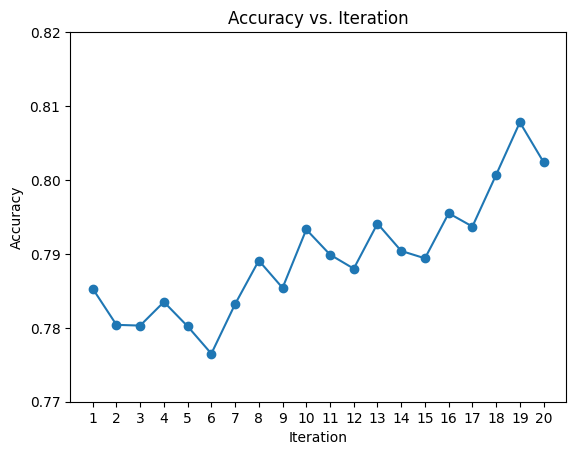

In [ ]:
# Step 2: Active Learning Loop
# Run the active learning loop for 20 iterations:
# In each iteration, a random sample is selected from the unlabeled pool, added to the labeled dataset,
# and the model is retrained on the updated dataset.
print("\nStarting active learning loop (20 iterations)...")

clf = deepcopy(global_clf)  # local model which is a deep copy of the global model

# To store the model's accuracy at each iteration
random_sampling_accuracies = []

for iteration in range(1, 21):
    print(f"\n--- Iteration {iteration} ---")

    # Step 2a: Randomly select a sample from the unlabeled pool
    # Select a random index from the unlabeled pool.
    selected_index = np.random.choice(len(X_unlabeled_pool))
    print(f"Randomly selected index from unlabeled pool: {selected_index}")

    # Step 2b: Get the selected sample and its true label
    selected_sample = X_unlabeled_pool[selected_index].reshape(1, -1)  # Reshape to preserve dimensions
    selected_label = y_unlabeled_pool[selected_index]
    print(f"Selected sample shape: {selected_sample.shape}")
    print(f"Selected label: {selected_label}")

    # Step 2c: Add the sample and label to the labeled dataset
    X_initial_labeled = np.vstack([X_initial_labeled, selected_sample])
    y_initial_labeled = np.append(y_initial_labeled, selected_label)
    print(f"Updated labeled dataset shape: {X_initial_labeled.shape}")
    print(f"Updated labeled labels shape: {y_initial_labeled.shape}")

    # Step 2d: Remove the selected sample and label from the unlabeled pool
    X_unlabeled_pool = np.delete(X_unlabeled_pool, selected_index, axis=0)
    y_unlabeled_pool = np.delete(y_unlabeled_pool, selected_index)
    print(f"Updated unlabeled pool shape: {X_unlabeled_pool.shape}")
    print(f"Updated unlabeled labels shape: {y_unlabeled_pool.shape}")

    # Step 2e: Retrain the model on the updated dataset
    print("Retraining the classifier on the updated labeled dataset...")
    clf.fit(X_initial_labeled, y_initial_labeled)
    print("Retraining complete!")

    # Step 2f: Check the model's accuracy on the test set
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    random_sampling_accuracies.append(accuracy)
    print(f"Accuracy on the test set: {accuracy:.4f}")

# Step 3: Print final summary of accuracies
print("\n--- Summary of Active Learning Accuracies ---")
for i, acc in enumerate(random_sampling_accuracies, 1):
    print(f"Iteration {i}: Accuracy = {acc:.4f}")


plt.plot(np.arange(1, 21, 1, dtype=int), random_sampling_accuracies)
plt.scatter(np.arange(1, 21, 1, dtype=int), random_sampling_accuracies)
plt.xlabel("Iteration")
plt.xticks(np.arange(1, 21, 1))
plt.ylim(0.77, 0.82)
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Iteration")

## Task 3 - Implement Uncertainty Sampling for Active Learning.


_For calculating Label Entropy and Vote Entropy, do not use functions from the library; write code from scratch_
#### Custom function for calculating entropy of an array containing probabilities of different classes

In [ ]:
def compute_entropy(probabilities, base=np.e):
    """Compute entropy for each sample as a measure of uncertainty.
    """
    # Avoid log(0) by replacing zeros with a very small number
    eps = 1e-10
    probabilities = np.clip(probabilities, eps, 1.0)

    # Compute entropy using the formula: H(p) = -sum(p * log(p)), then divide for base
    return -np.sum(probabilities * np.log(probabilities), axis=1) / np.log(base)

Testing the function alongside **scipy's entropy**

In [ ]:
from scipy.stats import entropy

test_arr = [[0, 0.2, 0, 0.5, 0.3]]
custom_entropy = compute_entropy(test_arr)
scipy_entropy = entropy(test_arr[0])

print(f"Custom Entropy: {custom_entropy}")
print(f"Scipy Entropy: {scipy_entropy}")

Custom Entropy: [1.02965302]
Scipy Entropy: 1.0296530140645737


As we can see, our custom function gives the same answer as scipy's function (takes log to the base e : natural log)

In [ ]:
X_initial_labeled = copyOf_X_initial_labeled
y_initial_labeled = copyOf_Y_initial_labeled

X_unlabeled_pool = copy_of_X_unlabeled_pool
y_unlabeled_pool = copy_of_Y_unlabeled_pool


Starting active learning loop with uncertainty sampling (20 iterations)...

--- Iteration 1 ---
Predicted probabilities shape: (59800, 10)
Uncertainties (entropy) computed for 59800 samples.
Index of most uncertain sample: 56784
Selected sample shape: (1, 784)
Selected label: 8
Updated labeled dataset shape: (201, 784)
Updated labeled labels shape: (201,)
Updated unlabeled pool shape: (59799, 784)
Updated unlabeled labels shape: (59799,)
Retraining the classifier on the updated labeled dataset...
Retraining complete!
Accuracy on the test set: 0.7834

--- Iteration 2 ---
Predicted probabilities shape: (59799, 10)
Uncertainties (entropy) computed for 59799 samples.
Index of most uncertain sample: 7644
Selected sample shape: (1, 784)
Selected label: 3
Updated labeled dataset shape: (202, 784)
Updated labeled labels shape: (202,)
Updated unlabeled pool shape: (59798, 784)
Updated unlabeled labels shape: (59798,)
Retraining the classifier on the updated labeled dataset...
Retraining comple

Text(0.5, 1.0, 'Accuracy vs. Iteration')

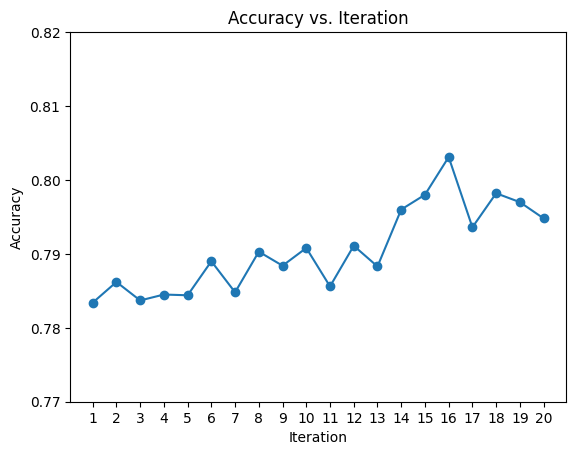

In [ ]:
# Task 3: Implement Uncertainty Sampling for Active Learning

# Step 1: Using the same initially trained model (RandomForest) used for doing task 2.

clf = deepcopy(global_clf)  # local model which is a deep copy of the global model

# In each iteration, compute uncertainty for unlabeled samples using entropy of class probabilities.
# Select the sample with the highest uncertainty, query its label, and update the labeled dataset.
# Retrain the model and evaluate accuracy on the test set.
print("\nStarting active learning loop with uncertainty sampling (20 iterations)...")

# To store the model's accuracy at each iteration
uncertainty_sampling_accuracies = []

for iteration in range(1, 21):
    print(f"\n--- Iteration {iteration} ---")

    # Step 2a: Compute uncertainty for each sample in the unlabeled pool
    # Predict class probabilities for the unlabeled pool.
    probabilities = clf.predict_proba(X_unlabeled_pool)
    print(f"Predicted probabilities shape: {probabilities.shape}")  # Shape: (num_unlabeled_samples, num_classes)

    # Compute entropy for each sample as a measure of uncertainty.
    # Entropy formula: H(p) = -sum(p * log(p)) for each sample
    uncertainties = compute_entropy(probabilities)  # Shape: (num_unlabeled_samples,)
    print(f"Uncertainties (entropy) computed for {len(uncertainties)} samples.")

    # Find the index of the sample with the highest uncertainty
    most_uncertain_index = np.argmax(uncertainties)
    print(f"Index of most uncertain sample: {most_uncertain_index}")

    # Step 2b: Select the most uncertain sample and query its true label
    selected_sample = X_unlabeled_pool[most_uncertain_index].reshape(1, -1)  # Reshape to preserve dimensions
    selected_label = y_unlabeled_pool[most_uncertain_index]
    print(f"Selected sample shape: {selected_sample.shape}")
    print(f"Selected label: {selected_label}")

    # Step 2c: Add the queried sample to the labeled dataset
    X_initial_labeled = np.vstack([X_initial_labeled, selected_sample])
    y_initial_labeled = np.append(y_initial_labeled, selected_label)
    print(f"Updated labeled dataset shape: {X_initial_labeled.shape}")
    print(f"Updated labeled labels shape: {y_initial_labeled.shape}")

    # Step 2d: Remove the selected sample from the unlabeled pool
    X_unlabeled_pool = np.delete(X_unlabeled_pool, most_uncertain_index, axis=0)
    y_unlabeled_pool = np.delete(y_unlabeled_pool, most_uncertain_index)
    print(f"Updated unlabeled pool shape: {X_unlabeled_pool.shape}")
    print(f"Updated unlabeled labels shape: {y_unlabeled_pool.shape}")

    # Step 2e: Retrain the model on the updated dataset
    print("Retraining the classifier on the updated labeled dataset...")
    clf.fit(X_initial_labeled, y_initial_labeled)
    print("Retraining complete!")

    # Step 2f: Check the model's accuracy on the test set
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    uncertainty_sampling_accuracies.append(accuracy)
    print(f"Accuracy on the test set: {accuracy:.4f}")

# Step 3: Print final summary of accuracies
print("\n--- Summary of Active Learning Accuracies ---")
for i, acc in enumerate(uncertainty_sampling_accuracies, 1):
    print(f"Iteration {i}: Accuracy = {acc:.4f}")


plt.plot(np.arange(1, 21, 1, dtype=int), uncertainty_sampling_accuracies)
plt.scatter(np.arange(1, 21, 1, dtype=int), uncertainty_sampling_accuracies)
plt.xlabel("Iteration")
plt.xticks(np.arange(1, 21, 1))
plt.ylim(0.77, 0.82)
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Iteration")

## Task 4 - Implement Query-by-Committee for Active Learning

In [ ]:
X_initial_labeled = copyOf_X_initial_labeled
y_initial_labeled = copyOf_Y_initial_labeled

X_unlabeled_pool = copy_of_X_unlabeled_pool
y_unlabeled_pool = copy_of_Y_unlabeled_pool


Starting active learning loop with Query-by-Committee (20 iterations)...

--- Iteration 1 ---
Committee predictions shape: (59800, 5)
Class probabilities shape: (59800, 10)
Disagreement (Vote Entropy) shape: (59800,)
Index of sample with most disagreement: 5317, with entropy: 1.609437923947026
Accuracy on test set (Iteration 1): 0.8018

--- Iteration 2 ---
Committee predictions shape: (59799, 5)
Class probabilities shape: (59799, 10)
Disagreement (Vote Entropy) shape: (59799,)
Index of sample with most disagreement: 4782, with entropy: 1.609437923947026
Accuracy on test set (Iteration 2): 0.8077

--- Iteration 3 ---
Committee predictions shape: (59798, 5)
Class probabilities shape: (59798, 10)
Disagreement (Vote Entropy) shape: (59798,)
Index of sample with most disagreement: 16064, with entropy: 1.609437923947026
Accuracy on test set (Iteration 3): 0.8091

--- Iteration 4 ---
Committee predictions shape: (59797, 5)
Class probabilities shape: (59797, 10)
Disagreement (Vote Entropy) sh

Text(0.5, 1.0, 'Accuracy vs. Iteration')

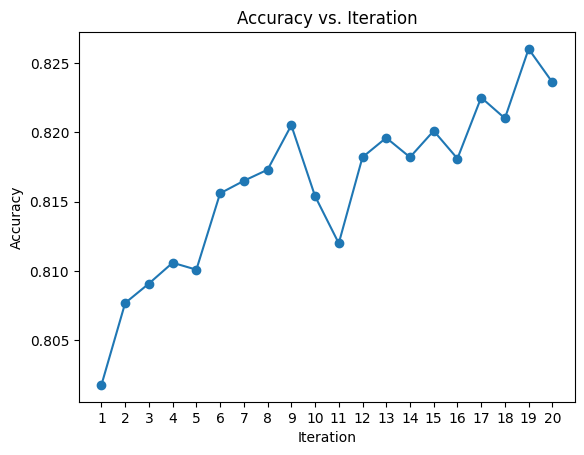

In [ ]:
# Step 1: Initialize a committee of 5 Random Forest models
committee_size = 5
committee = [RandomForestClassifier(random_state=i) for i in range(committee_size)]

# Train each member of the committee on the initial labeled dataset
for clf in committee:
    clf.fit(X_initial_labeled, y_initial_labeled)

# Step 2: Active Learning Loop
print("\nStarting active learning loop with Query-by-Committee (20 iterations)...")
committee_query_accuracies = []

for iteration in range(1, 21):
    print(f"\n--- Iteration {iteration} ---")

    # Step 2a: Compute predictions for unlabeled samples from all committee members
    committee_predictions = np.array([clf.predict(X_unlabeled_pool) for clf in committee]).T
    print(f"Committee predictions shape: {committee_predictions.shape}")

    # Step 2b: Measure disagreement using Vote Entropy
    # Calculate the probability of each class prediction for each sample.
    class_probabilities = np.apply_along_axis(lambda x: np.bincount(x, minlength=10) / len(x), axis=1, arr=committee_predictions)
    print(f"Class probabilities shape: {class_probabilities.shape}")

    # Compute vote entropy for each sample.
    disagreement = compute_entropy(class_probabilities)
    print(f"Disagreement (Vote Entropy) shape: {disagreement.shape}")

    # Step 2c: Select the sample with the highest disagreement
    most_disagreement = np.max(disagreement)
    most_disagreement_index = np.argmax(disagreement)
    print(f"Index of sample with most disagreement: {most_disagreement_index}, with entropy: {most_disagreement}")

    # Step 2d: Query the label of the selected sample
    selected_sample = X_unlabeled_pool[most_disagreement_index].reshape(1, -1)
    selected_label = y_unlabeled_pool[most_disagreement_index]

    # Step 2e: Update the labeled dataset
    X_initial_labeled = np.vstack([X_initial_labeled, selected_sample])
    y_initial_labeled = np.append(y_initial_labeled, selected_label)

    # Step 2f: Remove selected sample from the unlabeled pool
    X_unlabeled_pool = np.delete(X_unlabeled_pool, most_disagreement_index, axis=0)
    y_unlabeled_pool = np.delete(y_unlabeled_pool, most_disagreement_index)

    # Step 2g: Retrain all models in the committee
    for clf in committee:
        clf.fit(X_initial_labeled, y_initial_labeled)

    # Step 2h: Evaluate the committee's performance - taking predictions from the whole committee as a single entity and then comparing with ground truth
    y_preds = mode([model.predict(X_test) for model in committee]).mode  # using scipy's mode function
    accuracy = accuracy_score(y_test, y_preds)
    committee_query_accuracies.append(accuracy)
    print(f"Accuracy on test set (Iteration {iteration}): {accuracy:.4f}")

# Step 3: Print final summary of accuracies
print("\n--- Summary of Active Learning Accuracies (Query-by-Committee) ---")
for i, acc in enumerate(committee_query_accuracies, 1):
    print(f"Iteration {i}: Accuracy = {acc:.4f}")

plt.plot(np.arange(1, 21, 1, dtype=int), committee_query_accuracies)
plt.scatter(np.arange(1, 21, 1, dtype=int), committee_query_accuracies)
plt.xlabel("Iteration")
plt.xticks(np.arange(1, 21, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Iteration")

## Task 5 - Evaluation & Report
#### Compare the final model accuracy across all three strategies.

Method | Final Accuracy | Delta
---|---|---
Random Sampling | 80.24% | 1.71%
Uncertainty Sampling | 79.48% | 1.14%
Query-by-Committee | 82.36% | 2.18%

#### Plots the graph of accuracies for all three methods for 20 iterations.

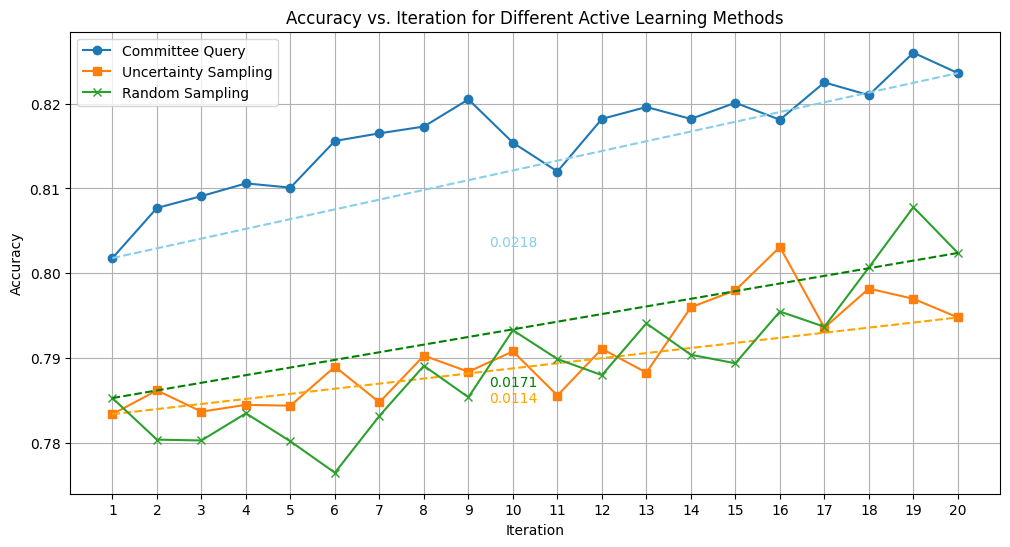

In [ ]:
plt.figure(figsize=(12, 6))

# Plot 1: Committee Query
plt.plot(np.arange(1, 21), committee_query_accuracies, label='Committee Query', marker='o')
start_point = committee_query_accuracies[0]
end_point = committee_query_accuracies[-1]
plt.plot([1, 20], [start_point, end_point], linestyle='--', color='skyblue')
plt.text(10, start_point + 0.001, f'{end_point - start_point:.4f}', ha='center', va='bottom', color = 'skyblue')


# Plot 2: Uncertainty Sampling
plt.plot(np.arange(1, 21), uncertainty_sampling_accuracies, label='Uncertainty Sampling', marker='s')
start_point = uncertainty_sampling_accuracies[0]
end_point = uncertainty_sampling_accuracies[-1]
plt.plot([1, 20], [start_point, end_point], linestyle='--', color='orange')
plt.text(10, start_point + 0.001, f'{end_point - start_point:.4f}', ha='center', va='bottom', color = 'orange')


# Plot 3: Random Sampling
plt.plot(np.arange(1, 21), random_sampling_accuracies, label='Random Sampling', marker='x')
start_point = random_sampling_accuracies[0]
end_point = random_sampling_accuracies[-1]
plt.plot([1, 20], [start_point, end_point], linestyle='--', color='green')
plt.text(10, start_point + 0.001, f'{end_point - start_point:.4f}', ha='center', va='bottom', color = 'green')

plt.xlabel("Iteration")
plt.xticks(np.arange(1, 21, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Iteration for Different Active Learning Methods")
plt.legend()
plt.grid(True)
plt.show()


#### As is visible clearly:
### 1. **Final Accuracy**
- **Query-by-Committee** achieves the highest final accuracy (**82.36%**), outperforming both Random Sampling and Uncertainty Sampling.
- **Random Sampling** achieves a moderate accuracy of **80.24%**, while **Uncertainty Sampling** performs slightly worse at **79.48%**.

### 2. **Delta (Improvement Over Initial Accuracy)**
- **Query-by-Committee** shows the largest improvement in accuracy (**2.18%**), indicating it is the most effective at leveraging active learning to enhance model performance in limited iterations.
- **Random Sampling** achieves a moderate improvement of **1.71%**.
- **Uncertainty Sampling** has the smallest improvement (**1.14%**), suggesting it is less effective at driving accuracy gains compared to the other methods.

### 3. **Cost-Effectiveness**
Cost-effectiveness is determined by balancing **final accuracy** and **improvement in accuracy**. A method is considered cost-effective if it achieves high accuracy with significant improvement, minimizing the need for additional resources or iterations.

- **Query-by-Committee** is the most effective method in terms of both **final accuracy** and **improvement**. However, it may require more computational resources or labeling effort due to its complexity.
- **Random Sampling** provides a good balance between **final accuracy** and **improvement**, making it a cost-effective choice for many applications.
- **Uncertainty Sampling** has the lowest **final accuracy** and **improvement**, making it the least cost-effective option among the three. It also requires additional computational resources and time compared to random sampling for calculating the **Label Entropies**.

### **Conclusion**
- **Query-by-Committee** is the best choice when **maximizing accuracy and improvement** is the primary goal, even if it requires more resources.
- **Random Sampling** is the most **cost-effective** method overall, offering a good balance between **final accuracy** and **improvement**, making it suitable for a wide range of applications.
- **Uncertainty Sampling** is the least effective method in this comparison, as it provides the smallest improvement and lowest final accuracy in return of additional complexity.

## Some limitations
- **Model Architecture and Hyperparameters**:
  - The performance of active learning methods depends on the underlying model (e.g., neural networks vs. SVMs). The assignment does not explore or talk about whether different model architecture and hyperparameters could impact the results.
  - Hyperparameters (e.g., committee size in Query-by-Committee) might disproportionately affect results.

- **Initial Accuracy Bias**:
  - The *initial accuracies had to be the same* to compare **Random sampling** and **Uncertainty sampling**, for which, the same initial RandomForestClassifier was used for both of them after training on the initial dataset of 200 images.
  - For Query-by-Committee, it was not possible to use the same initial model as the one used above.